# Análisis Exploratorio de Datos de Estudiantes
 Este notebook realiza un análisis exploratorio de un conjunto de datos de estudiantes, 
 explorando su rendimiento académico y características demográficas.

In [1]:
# Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Actividad 1:**
Realizar la carga de los datos en DataFrame diferentes. Mostrar la información de cada DataFrame y los primeros 5 datos.
DataFrame y los primeros 5 datos.

In [2]:
# Ruta base a los datos
path = "../data/raw/"

# Cargar los datos
assessments_df = pd.read_csv(f'{path}assessments.csv')
courses_df = pd.read_csv(f'{path}courses.csv')
student_assessment_df = pd.read_csv(f'{path}studentAssessment.csv')
student_info_df = pd.read_csv(f'{path}studentInfo.csv')
student_registration_df = pd.read_csv(f'{path}studentRegistration.csv')
student_vle_df = pd.read_csv(f'{path}studentVle.csv')
vle_df = pd.read_csv(f'{path}vle.csv')

In [3]:
def mostrar_info_df(df, nombre):
    print(f"\n--- Información de {nombre} ---")
    print(f"Forma: {df.shape}")
    print("\nTipos de datos:")
    print(df.dtypes)
    print("\nPrimeros 5 registros:")
    print(df.head())
    print("\nUltimos 5 registros:")
    print(df.tail())
    print("-" * 50)

In [4]:
# Mostrar informacion y las primeras filas de cada DataFrame
mostrar_info_df(assessments_df, "assessments_df")
mostrar_info_df(courses_df, "courses_df")
mostrar_info_df(student_assessment_df, "student_assessment_df")
mostrar_info_df(student_info_df, "student_info_df")
mostrar_info_df(student_registration_df, "student_registration_df")
mostrar_info_df(student_vle_df, "student_vle_df")
mostrar_info_df(vle_df, "vle_df")


--- Información de assessments_df ---
Forma: (206, 6)

Tipos de datos:
code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                  object
weight               float64
dtype: object

Primeros 5 registros:
  code_module code_presentation  id_assessment assessment_type date  weight
0         AAA             2013J           1752             TMA   19    10.0
1         AAA             2013J           1753             TMA   54    20.0
2         AAA             2013J           1754             TMA  117    20.0
3         AAA             2013J           1755             TMA  166    20.0
4         AAA             2013J           1756             TMA  215    30.0

Ultimos 5 registros:
    code_module code_presentation  id_assessment assessment_type date  weight
201         GGG             2014J          37443             CMA  229     0.0
202         GGG             2014J          37435             TMA   61     0.0
203  

**Actividad 2:**
Evaluacion de datos faltantes

In [5]:
# Si todo False, entonces no faltan registros
print(assessments_df.isnull().any())
print(student_assessment_df.isnull().any())
print(student_info_df.isnull().any())
print(student_registration_df.isnull().any())
print(student_vle_df.isnull().any())
print(vle_df.isnull().any())


code_module          False
code_presentation    False
id_assessment        False
assessment_type      False
date                 False
weight               False
dtype: bool
id_assessment     False
id_student        False
date_submitted    False
is_banked         False
score             False
dtype: bool
code_module             False
code_presentation       False
id_student              False
gender                  False
region                  False
highest_education       False
imd_band                False
age_band                False
num_of_prev_attempts    False
studied_credits         False
disability              False
final_result            False
dtype: bool
code_module            False
code_presentation      False
id_student             False
date_registration      False
date_unregistration    False
dtype: bool
code_module          False
code_presentation    False
id_student           False
id_site              False
date                 False
sum_click            False
dty

In [6]:
#Pero hay registros con "?" en lugar de NaN
# cuantos "?" hay en cada columna
def contar_signos_interrogacion(df, nombre):
    print(f"\n--- Conteo de signos de interrogación en {nombre} ---")
    conteo = (df == '?').sum()
    total = conteo.sum()
    print(f"Total de valores '?' en el DataFrame: {total}")
    print("Distribución por columnas:")
    print(conteo[conteo > 0])
    return print(conteo)

# Contar signos de interrogación en cada DataFrame
contar_signos_interrogacion(assessments_df, "assessments_df")
contar_signos_interrogacion(courses_df, "courses_df")
contar_signos_interrogacion(student_assessment_df, "student_assessment_df")
contar_signos_interrogacion(student_info_df, "student_info_df")
contar_signos_interrogacion(student_registration_df, "student_registration_df")
contar_signos_interrogacion(student_vle_df, "student_vle_df")
contar_signos_interrogacion(vle_df, "vle_df")


--- Conteo de signos de interrogación en assessments_df ---
Total de valores '?' en el DataFrame: 11
Distribución por columnas:
date    11
dtype: int64
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

--- Conteo de signos de interrogación en courses_df ---
Total de valores '?' en el DataFrame: 0
Distribución por columnas:
Series([], dtype: int64)
code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

--- Conteo de signos de interrogación en student_assessment_df ---
Total de valores '?' en el DataFrame: 173
Distribución por columnas:
score    173
dtype: int64
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

--- Conteo de signos de interrogación en student_info_df ---
Total de valores '?' en el DataFrame: 1111
Distribución por columnas:
imd_band    11

In [7]:
# Reemplazar "?" por NaN
def interrogacion_por_nan(df):
    df_reemplazado = df.replace('?', np.nan)
    return df_reemplazado

# Reemplazar "?" por NaN en cada DataFrame
nan_student_assessments_df = pd.DataFrame(interrogacion_por_nan(student_assessment_df).copy())
nan_student_info_df = pd.DataFrame(interrogacion_por_nan(student_info_df).copy())
nan_student_registration_df = pd.DataFrame(interrogacion_por_nan(student_registration_df).copy())
nan_vle_df = pd.DataFrame(interrogacion_por_nan(vle_df).copy())


In [8]:
# Verificar si hay valores NaN
print(nan_student_assessments_df.isnull().any())
print(nan_student_info_df.isnull().any())
print(nan_student_registration_df.isnull().any())
print(nan_vle_df.isnull().any())

id_assessment     False
id_student        False
date_submitted    False
is_banked         False
score              True
dtype: bool
code_module             False
code_presentation       False
id_student              False
gender                  False
region                  False
highest_education       False
imd_band                 True
age_band                False
num_of_prev_attempts    False
studied_credits         False
disability              False
final_result            False
dtype: bool
code_module            False
code_presentation      False
id_student             False
date_registration       True
date_unregistration     True
dtype: bool
id_site              False
code_module          False
code_presentation    False
activity_type        False
week_from             True
week_to               True
dtype: bool


**Actividad 3:**
Código para confirmar la siguiente información:
- students in courses: 32953
- course-presentations: 22
- VLE pages: 6364
- VLE log entries: 10655280
- registration entries: 32953
- assessments: 206
- assessment entries: 173912


In [9]:
# Cantidad de observacion o registros por df
def cant_registros_df(df, nombre):
    print(f"Cantidad de registros en DataFrame {nombre}: {df.shape[0]}")

#Cantidad de estudiantes unicos
estudiantes_id_df = pd.DataFrame(student_info_df['id_student'].unique())

#Cantidad de cursos unicos
modulos_df = pd.DataFrame(courses_df['code_module'].unique())

#Cantidad de sitios unicos unicos
sites_df = pd.DataFrame(nan_vle_df['id_site'].unique())

#Cantidad de assessments unicos
id_assessments_df = pd.DataFrame(assessments_df['id_assessment'].unique())


In [10]:
cant_registros_df(nan_student_info_df, "'student info' o 'students in courses'")
print(f"Número total de estudiantes según ID: {estudiantes_id_df.shape[0]}")
cant_registros_df(courses_df, "'course-presentations'")
print(f"Número total de módulos únicos: {modulos_df.shape[0]}")
cant_registros_df(nan_vle_df, "'vle' o 'VLE pages'")
print(f"Número total de sitios únicos: {sites_df.shape[0]}")
cant_registros_df(student_vle_df, "'student vle' o 'VLE log entries'")
cant_registros_df(nan_student_registration_df, "'student registration' o 'registrations entries'")
cant_registros_df(assessments_df, "'assessments'")
print(f"Numero total de assessments únicos: {id_assessments_df.shape[0]}")
cant_registros_df(nan_student_assessments_df, "'student assessment' o 'assessment entries'")

Cantidad de registros en DataFrame 'student info' o 'students in courses': 32593
Número total de estudiantes según ID: 28785
Cantidad de registros en DataFrame 'course-presentations': 22
Número total de módulos únicos: 7
Cantidad de registros en DataFrame 'vle' o 'VLE pages': 6364
Número total de sitios únicos: 6364
Cantidad de registros en DataFrame 'student vle' o 'VLE log entries': 10655280
Cantidad de registros en DataFrame 'student registration' o 'registrations entries': 32593
Cantidad de registros en DataFrame 'assessments': 206
Numero total de assessments únicos: 206
Cantidad de registros en DataFrame 'student assessment' o 'assessment entries': 173912


**Actividad 4:**
Porcentaje de estudiantes que proviene de diferentes regiones, separado por el Sexo de los estudiantes.

In [11]:
# Agrupar datos por región y sexo
region_gender_counts = nan_student_info_df.groupby(['region', 'gender']).size().unstack(fill_value=0)
print(region_gender_counts)

gender                   F     M
region                          
East Anglian Region   1623  1717
East Midlands Region  1137  1228
Ireland                528   656
London Region         1513  1703
North Region           619  1204
North Western Region  1221  1685
Scotland              1407  2039
South East Region     1006  1105
South Region          1346  1746
South West Region     1145  1291
Wales                 1043  1043
West Midlands Region  1182  1400
Yorkshire Region       948  1058


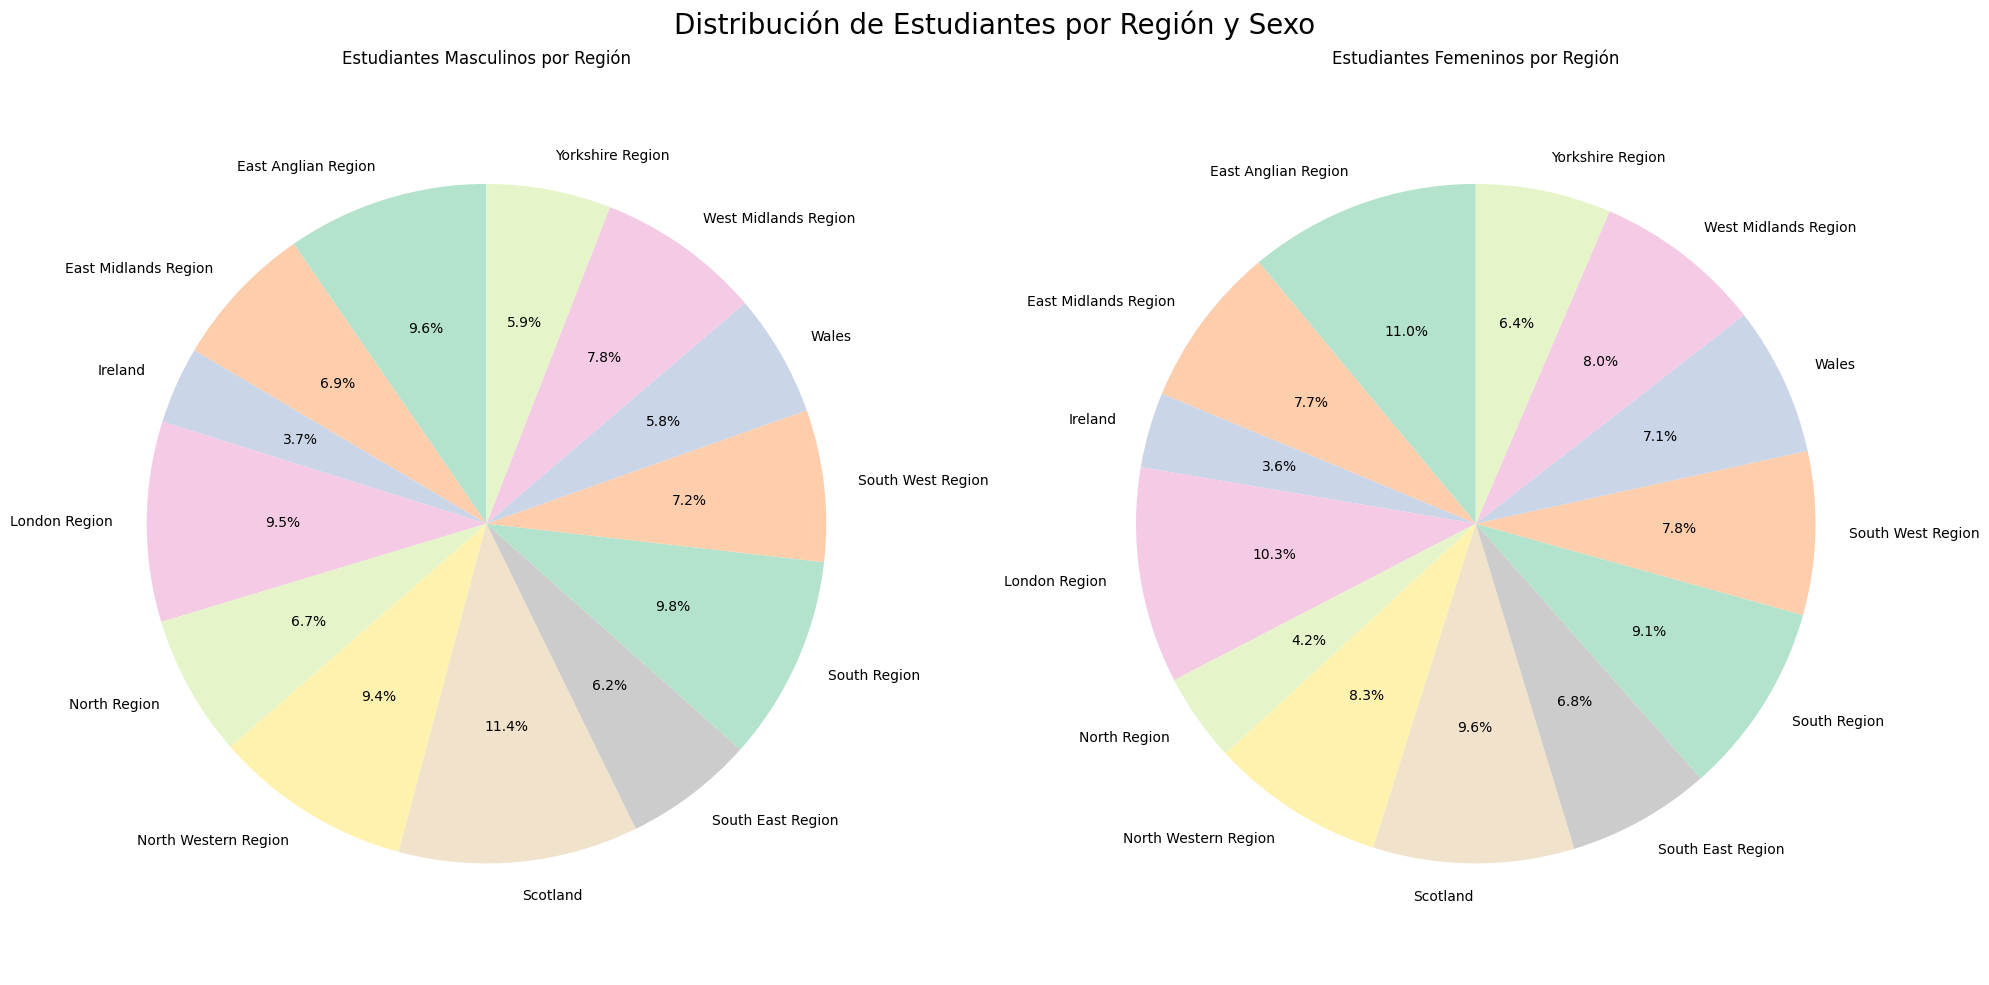

In [12]:
genders = nan_student_info_df["gender"].unique()

# Gráfico de torta para la cantidad de estudiantes por región y sexo
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Distribución de Estudiantes por Región y Sexo', fontsize=20)

for i, gender in enumerate(genders):
    region_counts_by_gender = region_gender_counts[gender]
    
    etiquetas = region_counts_by_gender.index
    tamanos = region_counts_by_gender.values
    
    axes[i].pie(tamanos, 
                labels=etiquetas, 
                autopct='%1.1f%%', 
                shadow=False, 
                startangle=90, 
                colors=plt.cm.Pastel2.colors
                )
    
    gender_text = "Masculinos" if gender == "M" else "Femeninos"
    axes[i].set_title(f'Estudiantes {gender_text} por Región')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

**Actividad 5:**
Agregación de las notas finales en un único DataFrame, con promedio ponderado de cada estudiante y su genero por curso realizado.

In [15]:
#DataFrame unico con columnas: ’code_module’, ’code_presentation’, id_student’. 

#code_module, code_presentation, id_student, gender están en student_registration_df
student_and_modules_df = nan_student_registration_df[['id_student','code_module', 'code_presentation']].copy()
print(student_and_modules_df.shape)

#Incorporar el id_assessment a al nuevo df que está en student_assessment_df
student_and_modules_df = student_and_modules_df.merge(
    nan_student_assessments_df[['id_student', 'id_assessment']],
    on='id_student',
    how='left'
)
print(student_and_modules_df.head(20))
print(student_and_modules_df.shape)

(32593, 3)
    id_student code_module code_presentation  id_assessment
0        11391         AAA             2013J         1752.0
1        11391         AAA             2013J         1753.0
2        11391         AAA             2013J         1754.0
3        11391         AAA             2013J         1755.0
4        11391         AAA             2013J         1756.0
5        28400         AAA             2013J         1752.0
6        28400         AAA             2013J         1753.0
7        28400         AAA             2013J         1754.0
8        28400         AAA             2013J         1755.0
9        28400         AAA             2013J         1756.0
10       30268         AAA             2013J            NaN
11       31604         AAA             2013J         1752.0
12       31604         AAA             2013J         1753.0
13       31604         AAA             2013J         1754.0
14       31604         AAA             2013J         1755.0
15       31604         AAA   

In [16]:
#Eliminar los exámenes
#tipo de evaluaciones (assessment_type) está en assessments_df
print(assessments_df["assessment_type"].unique())

#DF con solo las evaluaciones, sin examenes
sin_exam_assessments = assessments_df[assessments_df['assessment_type'] != 'Exam']
print(sin_exam_assessments.head())
print(sin_exam_assessments.shape)



['TMA' 'Exam' 'CMA']
  code_module code_presentation  id_assessment assessment_type date  weight
0         AAA             2013J           1752             TMA   19    10.0
1         AAA             2013J           1753             TMA   54    20.0
2         AAA             2013J           1754             TMA  117    20.0
3         AAA             2013J           1755             TMA  166    20.0
4         AAA             2013J           1756             TMA  215    30.0
(182, 6)


In [22]:
#DF con ponderación(weight) por tarea (assessment) de cada estudiante 
weight_assessments_df = student_and_modules_df.merge(
    sin_exam_assessments[['id_assessment', 'weight']],
    on='id_assessment',
    how='inner'
    )

weight_assessments_df.head()

#DF con nota(score) por tarea (assessment) de cada estudiante
scores_df = weight_assessments_df.merge(
    nan_student_assessments_df[['id_student', 'id_assessment', 'score']],
    on=['id_student', 'id_assessment'],
    how='inner'
)
mostrar_info_df(scores_df, "scores_df")

# Columna score a numérica
scores_df['score'] = pd.to_numeric(scores_df['score'], errors='coerce')
# Columna weight si vale 0 transformar a NaN
scores_df['weight']= scores_df['weight'].replace(0.0, np.nan)

# Producto score * weight/100 para cada evaluación
scores_df['weighted_score'] = scores_df['score'] * (scores_df['weight']/100)
mostrar_info_df(scores_df, "scores_df")


--- Información de scores_df ---
Forma: (200648, 6)

Tipos de datos:
id_student             int64
code_module           object
code_presentation     object
id_assessment        float64
weight               float64
score                 object
dtype: object

Primeros 5 registros:
   id_student code_module code_presentation  id_assessment  weight score
0       11391         AAA             2013J         1752.0    10.0    78
1       11391         AAA             2013J         1753.0    20.0    85
2       11391         AAA             2013J         1754.0    20.0    80
3       11391         AAA             2013J         1755.0    20.0    85
4       11391         AAA             2013J         1756.0    30.0    82

Ultimos 5 registros:
        id_student code_module code_presentation  id_assessment  weight score
200643     2684003         GGG             2014J        37437.0     0.0    60
200644     2684003         GGG             2014J        37438.0     0.0   100
200645     2684003       

In [19]:
#DF final con Notas finales ponderadas por estudiante 

final_scores_by_student_df = scores_df.groupby(['id_student', 'code_module', 'code_presentation'])
print(final_scores_by_student_df.head())
print(final_scores_by_student_df.groups.keys())


        id_student code_module code_presentation  id_assessment  weight  \
0            11391         AAA             2013J         1752.0    10.0   
1            11391         AAA             2013J         1753.0    20.0   
2            11391         AAA             2013J         1754.0    20.0   
3            11391         AAA             2013J         1755.0    20.0   
4            11391         AAA             2013J         1756.0    30.0   
...            ...         ...               ...            ...     ...   
200641     2684003         GGG             2014J        37435.0     0.0   
200642     2684003         GGG             2014J        37436.0     0.0   
200643     2684003         GGG             2014J        37437.0     0.0   
200644     2684003         GGG             2014J        37438.0     0.0   
200645     2684003         GGG             2014J        37439.0     0.0   

        score  weighted_score  
0        78.0             7.8  
1        85.0            17.0  
2  

In [ ]:
#DF con valores NaN
#nan_student_assessments_df
#nan_student_info_df
#nan_student_registration_df
#nan_vle_df
